In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Zoo.csv')

In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [6]:
df.drop('animal name',axis=1,inplace=True)

In [7]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


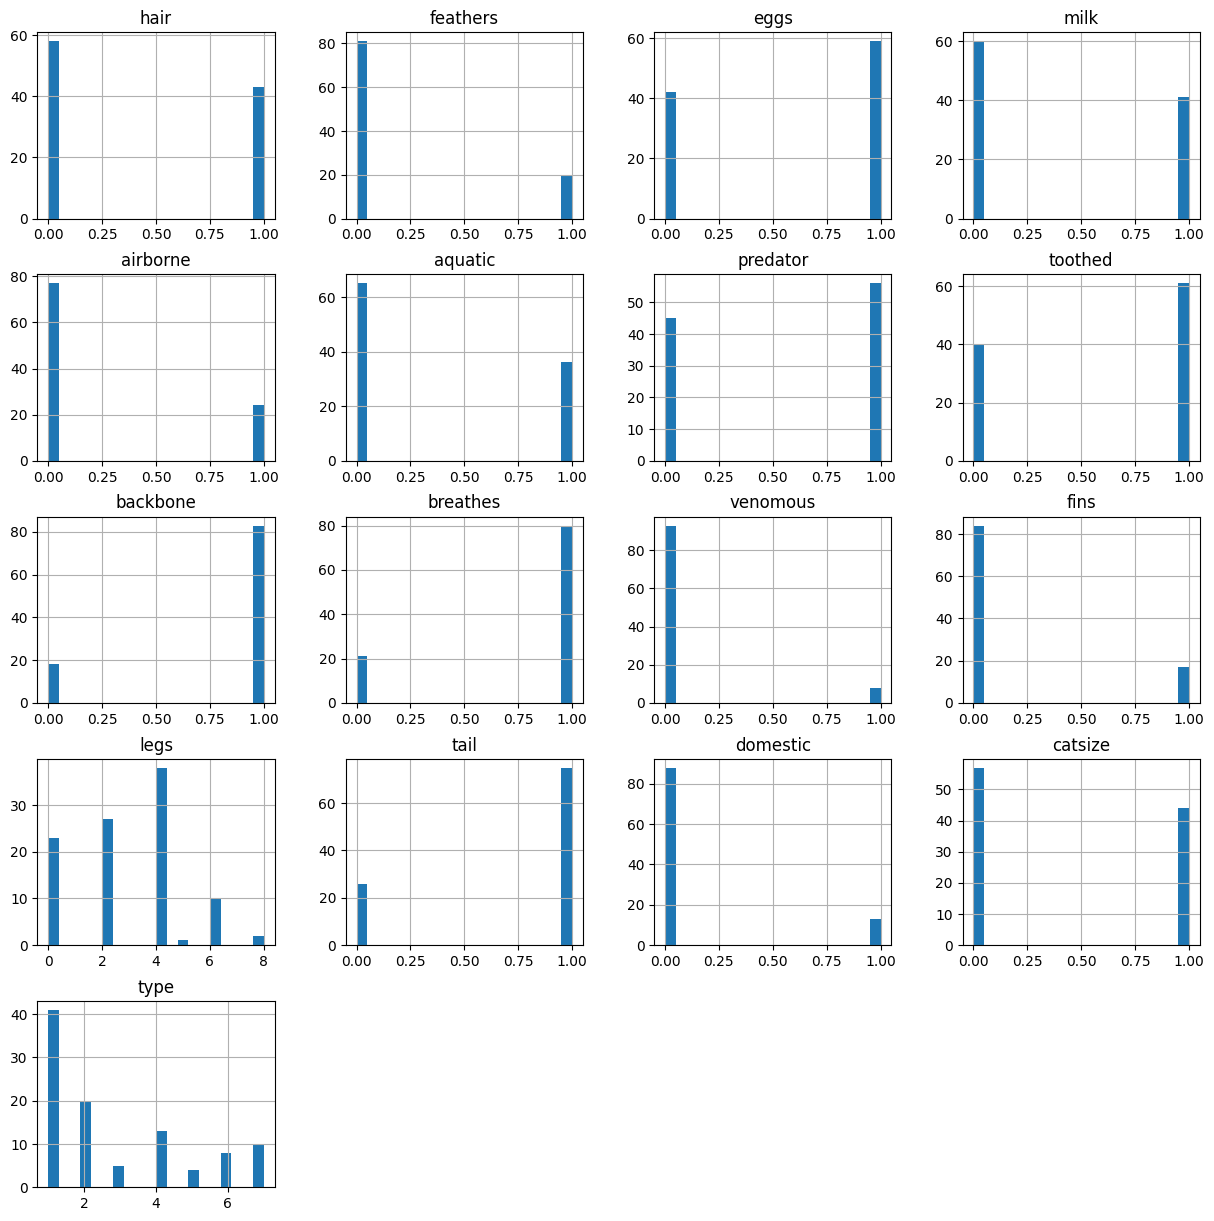

In [8]:
df.hist(bins=20,figsize=(15,15))
plt.show()

In [9]:
print('airborne:\n', df['airborne'].value_counts())
print('aquatic:\n', df['aquatic'].value_counts())





airborne:
 airborne
0    77
1    24
Name: count, dtype: int64
aquatic:
 aquatic
0    65
1    36
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

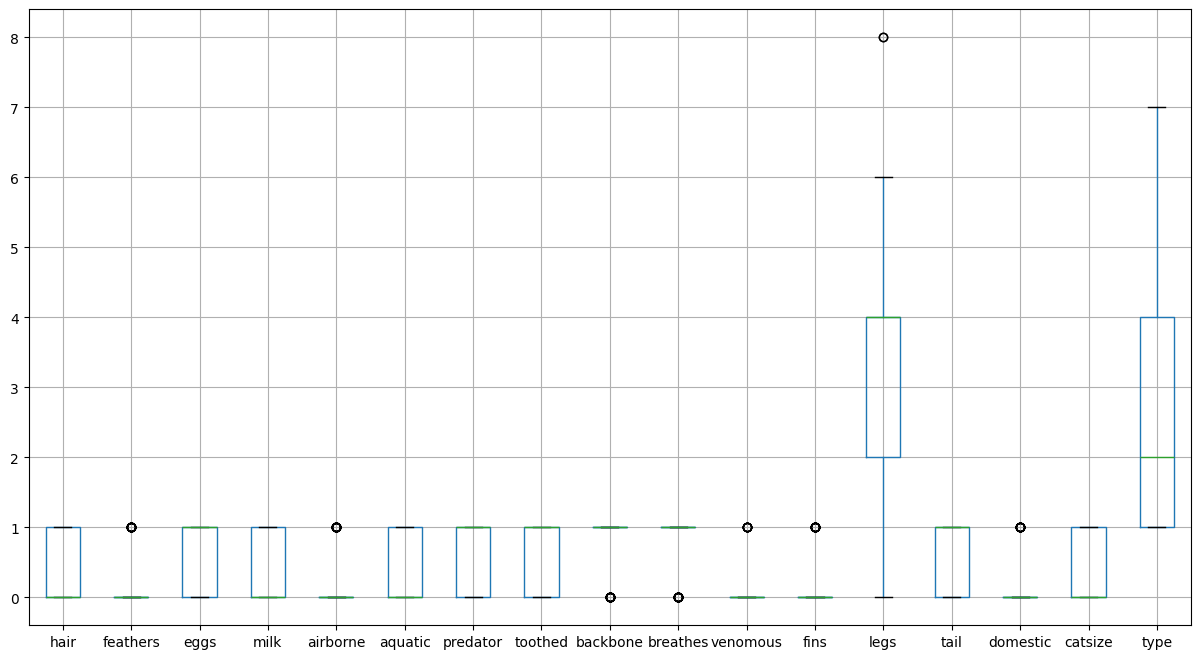

In [10]:
df.boxplot(figsize=(15,8))
plt.show

In [11]:
corr=df.corr()

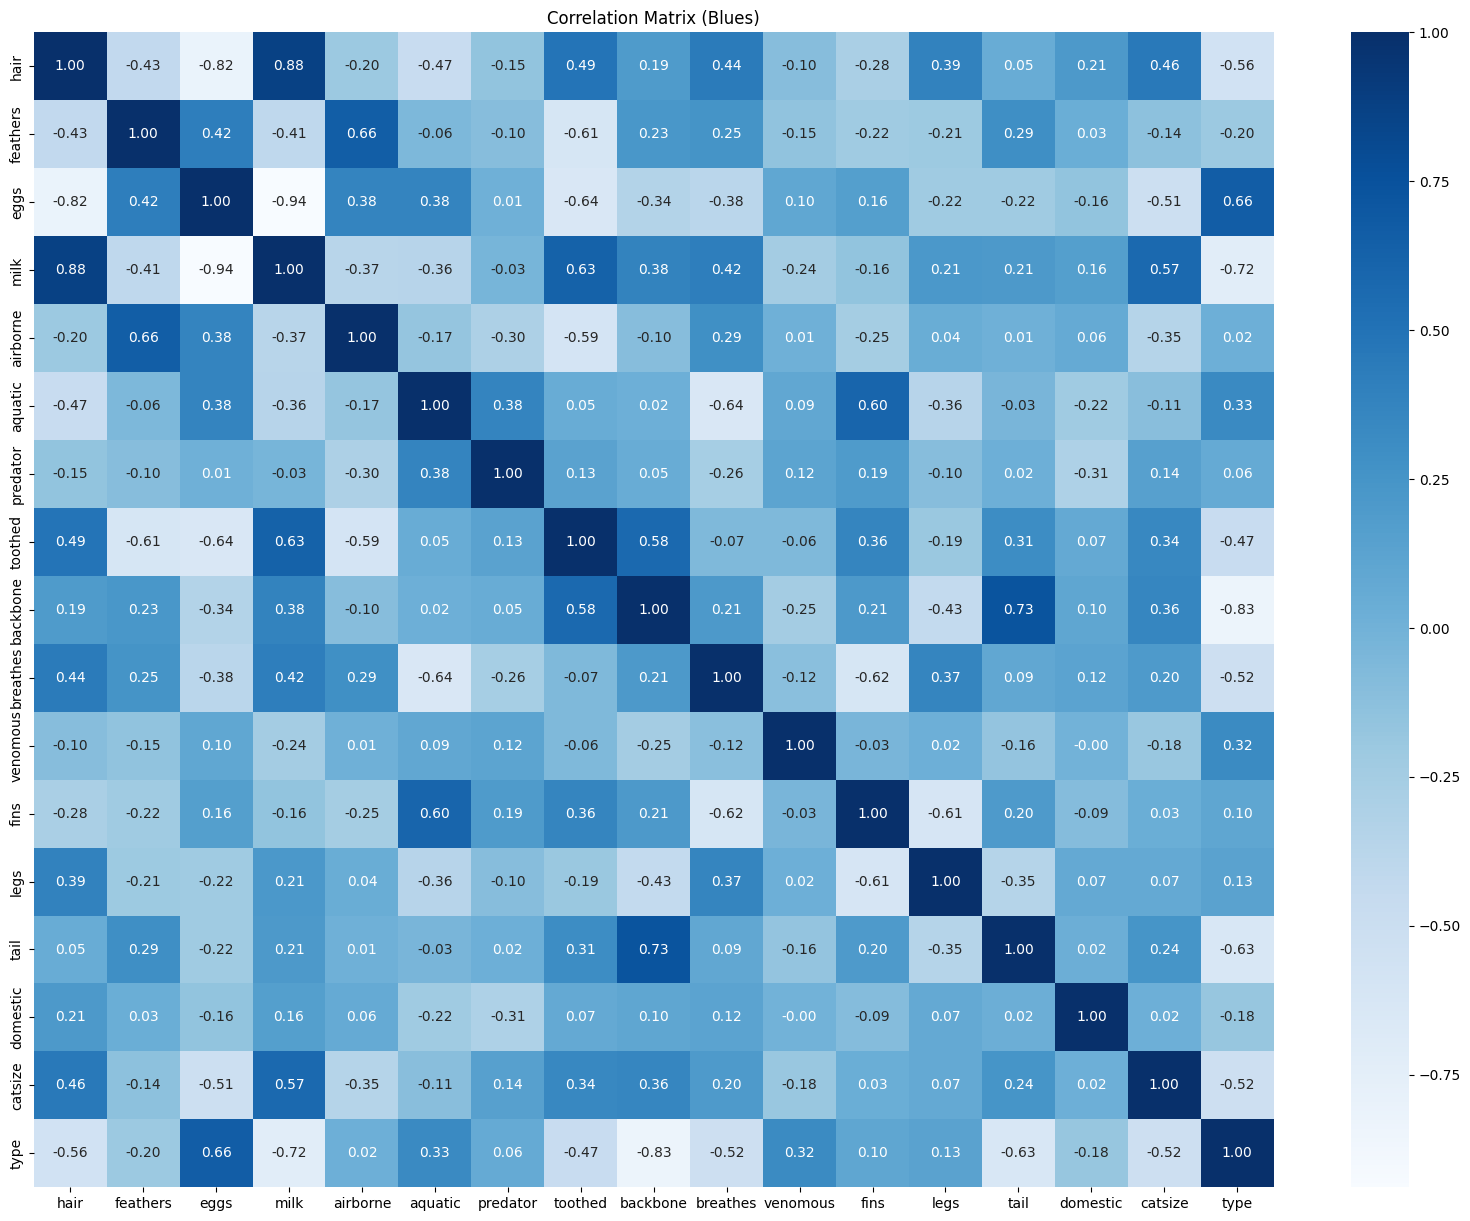

In [12]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    corr,
    annot=True,
    cmap='Blues',
    fmt=".2f"
)
plt.title('Correlation Matrix (Blues)')
plt.show()

In [13]:
x = df.iloc[:,0:16]

In [14]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
 y =df.iloc[:,-1]

In [16]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
#scalling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [19]:
x_train

array([[-0.77459667, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058],
       [-0.77459667, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058],
       [-0.77459667, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058],
       ...,
       [-0.77459667, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058],
       [-0.77459667, -0.53881591,  0.7540739 , ...,  0.59660054,
        -0.3992747 ,  1.19341628],
       [ 1.29099445, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058]])

In [20]:
#fit model and the values of  k = 3,5,7
k_value = [3,5,7]
accuracies ={}
for k in k_value :
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[k] = accuracy


  print(f"KNN with k={k}: Accuracy = {accuracy:.4f}")


KNN with k=3: Accuracy = 0.9524
KNN with k=5: Accuracy = 0.9524
KNN with k=7: Accuracy = 0.9048


In [21]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

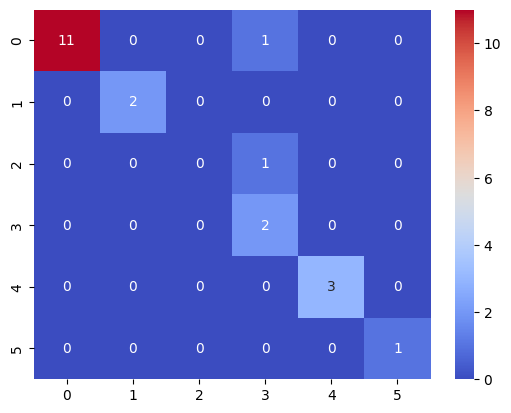

In [22]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

In [23]:
precision = precision_score(y_test, y_pred,average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred,average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred,average='weighted', zero_division=0)

In [24]:
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

precision: 0.9047619047619048
recall: 0.9047619047619048
f1: 0.8957902001380263


In [29]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [36]:
x = df[["backbone", "eggs","milk"]].values
y = df["type"].values

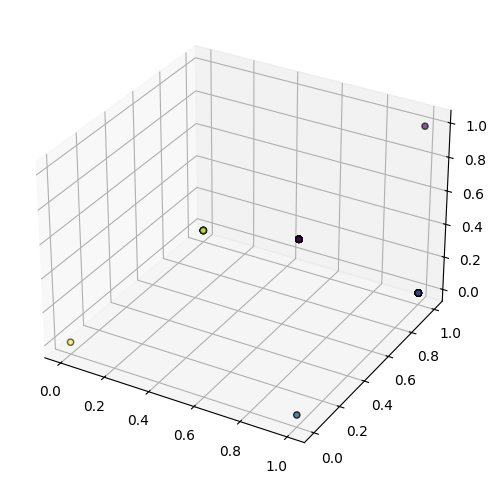

In [37]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:,0], x[:,1], x[:,2], c=y, edgecolors="k")

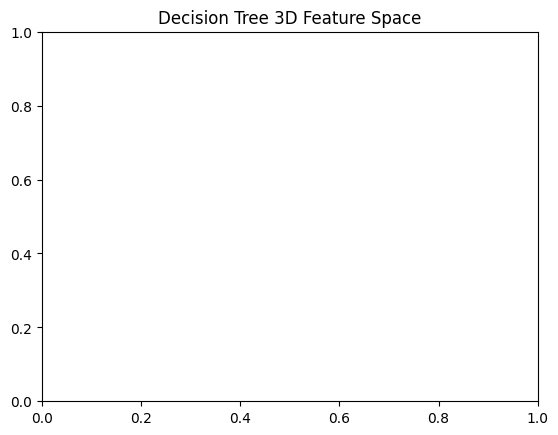

In [39]:
ax.set_xlabel("backbone")
ax.set_ylabel("milk")
ax.set_zlabel("Eggs")
plt.title("Decision Tree 3D Feature Space")
plt.show()